<h1>Decision Tree Classifier</h1>

In this notebook, we will construct a Classification Tree ML Model to help us classify a salary class based on our features

<b>Importing of essential libraries</b>

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix, f1_score
import graphviz, pydotplus
sb.set()

<b>Importing train and test datasets</b>

In [93]:
#train datasets
x_train = pd.read_csv('Data/x_train.csv')
y_train = pd.read_csv('Data/y_train.csv')

#test datasets
x_test = pd.read_csv('Data/x_test.csv')
y_test = pd.read_csv('Data/y_test.csv')

Checking dimensions of our datasets

In [3]:
print('Train Set:', x_train.shape, y_train.shape)
print('Test Set:', x_test.shape, y_test.shape)

Train Set: (51195, 22) (51195, 1)
Test Set: (12799, 22) (12799, 1)


In [60]:
catvar = []
numvar = ['Age', 'Last Week Working Hrs', 'HrsWeek']
for var in x_train.columns:
    if var not in numvar:
        x_train[var]=x_train[var].astype('category')
        x_test[var] = x_test[var].astype('category')

<b>Constructing Our Classification Tree: Base Model Tree of max_depth 3</b>

In [62]:
tree = DecisionTreeClassifier(max_depth=3) #we will first start with a depth of 3
tree.fit(x_train, y_train) #fit tree with train dataset

DecisionTreeClassifier(max_depth=3)

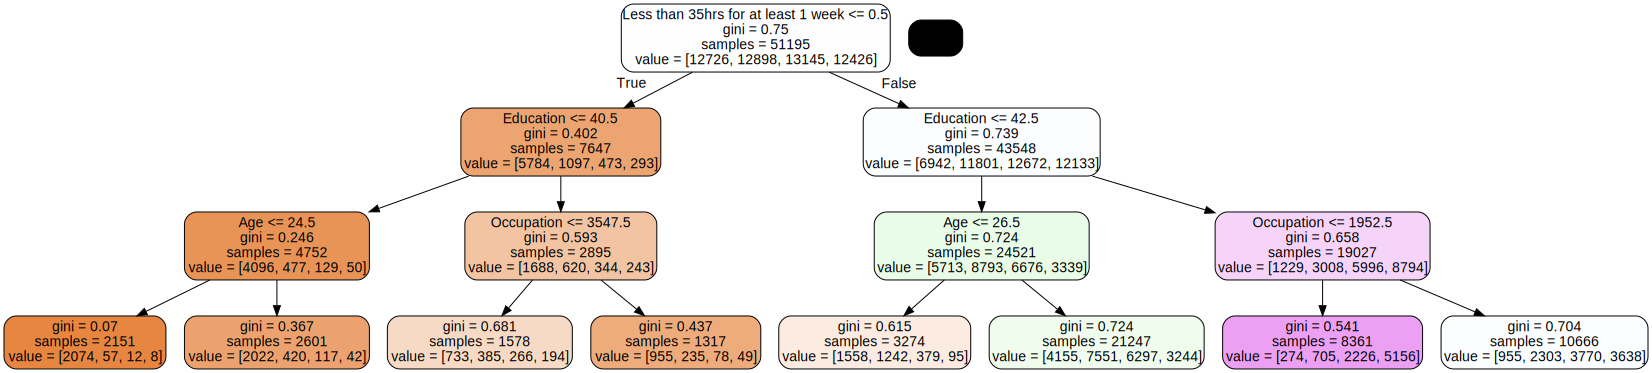

In [67]:
tree_data = export_graphviz(tree, feature_names=x_train.columns, out_file=None, filled=True, rounded=True)
treeviz = pydotplus.graph_from_dot_data(tree_data)
graphviz.Source(treeviz.to_string())

<b>Performance of Tree of Maximum Depth 3</b>

In [68]:
#we will use our model to predict and check for difference between the test data and the predicted data
y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)

F1 Score for Train Data: 0.4689991497574831
F1 Score for Test Data: 0.47628613865593966


<AxesSubplot:>

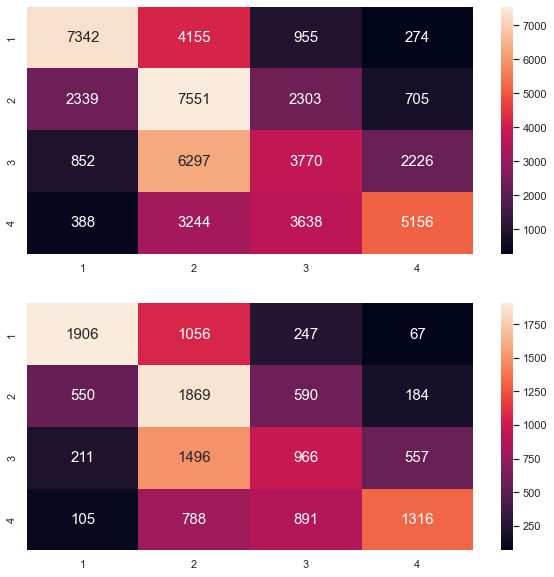

In [69]:
#plotting the confusion matrix of our results
fig, axes = plt.subplots(2, 1, figsize=(10,10))
print('F1 Score for Train Data:', f1_score(y_train, y_train_pred, average='macro'))
print('F1 Score for Test Data:', f1_score(y_test, y_test_pred, average='macro'))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

<b>Insights from Base Model</b>
<br>The base model is not performing very well (f1=0.47628).

<h2>Hyperparameter Tuning (Depth of Tree)</h2>

We can improve the performance of our model by tuning its hyperparameters. For our model, we can tune the maximum depth of the tree.

<b>Tree of max_depth 4</b>

In [70]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

<b>Performance of Tree of Maximum Depth 4</b>

In [71]:
y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)

F1 Score for Train Data: 0.5016245433843228
F1 Score for Test Data: 0.5060655111595666


<AxesSubplot:>

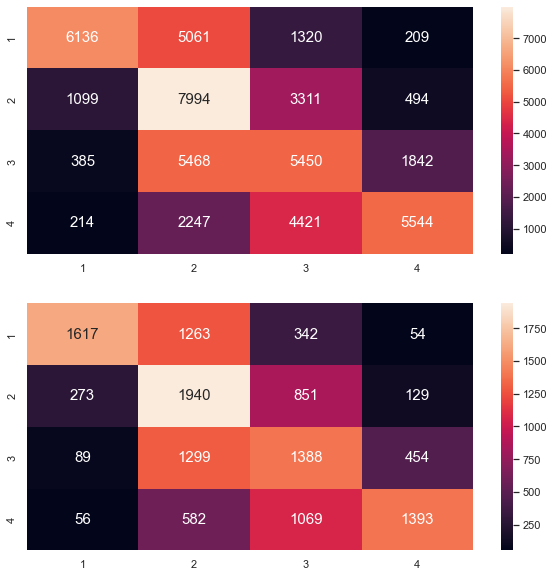

In [72]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))
print('F1 Score for Train Data:', f1_score(y_train, y_train_pred, average='macro'))
print('F1 Score for Test Data:', f1_score(y_test, y_test_pred, average='macro'))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

<b>Tree of max_depth 5</b>

In [73]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

<b>Performance of Tree of Maximum Depth 5</b>

In [76]:
y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)

F1 Score for Train Data: 0.49819318292802034
F1 Score for Test Data: 0.49847644347214626


<AxesSubplot:>

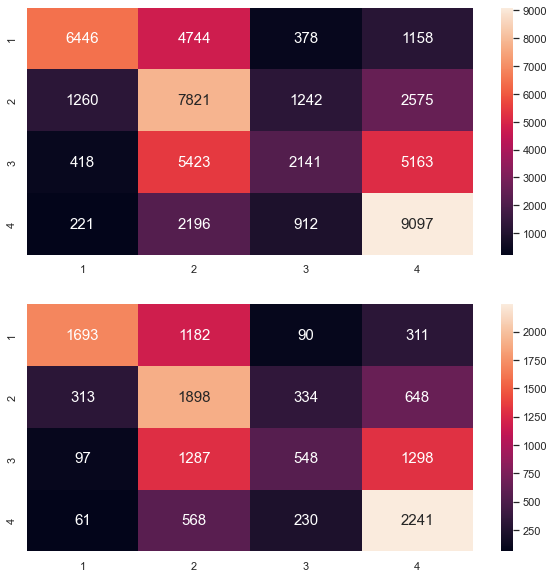

In [77]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))
print('F1 Score for Train Data:', f1_score(y_train, y_train_pred, average='micro'))
print('F1 Score for Test Data:', f1_score(y_test, y_test_pred, average='micro'))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

<b>Performance of Maximum Depth 7</b>

In [78]:
tree = DecisionTreeClassifier(max_depth=7)
tree.fit(x_train, y_train)

y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)

F1 Score for Train Data: 0.5353796009602778
F1 Score for Test Data: 0.5287276558313878


<AxesSubplot:>

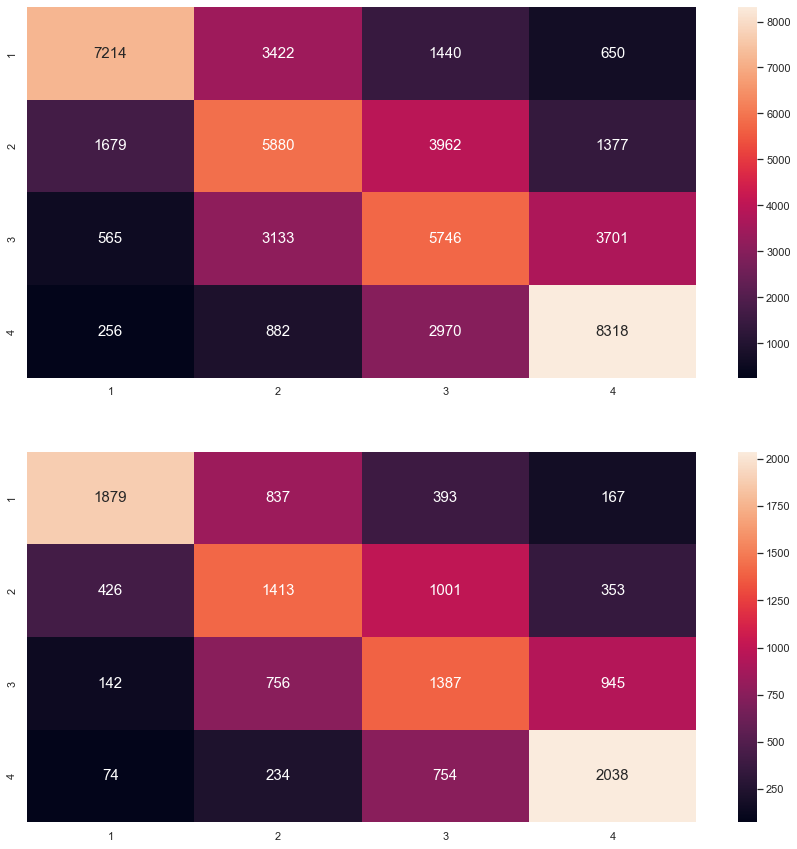

In [79]:
fig, axes = plt.subplots(2, 1, figsize=(15,15))
print('F1 Score for Train Data:', f1_score(y_train, y_train_pred, average='macro'))
print('F1 Score for Test Data:', f1_score(y_test, y_test_pred, average='macro'))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

<b>Performance of Maximum Depth 9</b>

In [80]:
tree = DecisionTreeClassifier(max_depth=9)
tree.fit(x_train, y_train)

y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)

F1 Score for Train Data: 0.5557835548514147
F1 Score for Test Data: 0.5318319754367932


<AxesSubplot:>

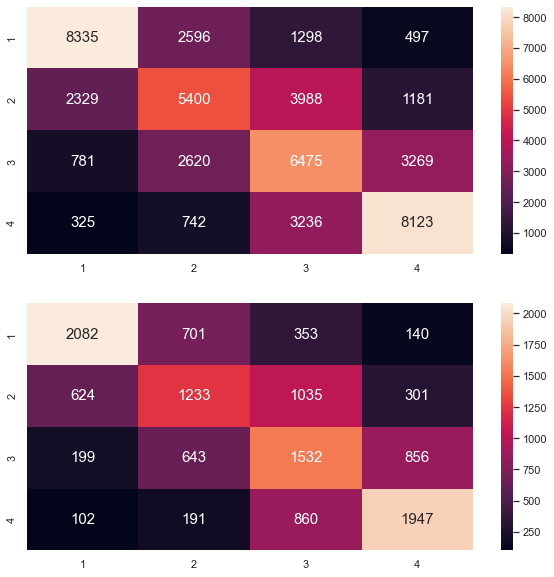

In [81]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))
print('F1 Score for Train Data:', f1_score(y_train, y_train_pred, average='macro'))
print('F1 Score for Test Data:', f1_score(y_test, y_test_pred, average='macro'))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

<b>Performance of Maximum Depth 11</b>

In [82]:
tree = DecisionTreeClassifier(max_depth=11)
tree.fit(x_train, y_train)

y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)

F1 Score for Train Data: 0.5930535740206109
F1 Score for Test Data: 0.5348943902224275


<AxesSubplot:>

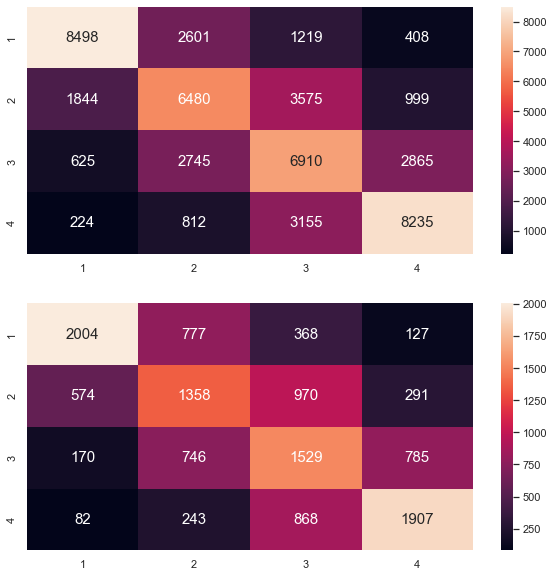

In [83]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))
print('F1 Score for Train Data:', f1_score(y_train, y_train_pred, average='macro'))
print('F1 Score for Test Data:', f1_score(y_test, y_test_pred, average='macro'))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

<b>Performance of Maximum Depth 13</b>

In [84]:
tree = DecisionTreeClassifier(max_depth=13)
tree.fit(x_train, y_train)

y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)

F1 Score for Train Data: 0.6401136778441445
F1 Score for Test Data: 0.5294078254465376


<AxesSubplot:>

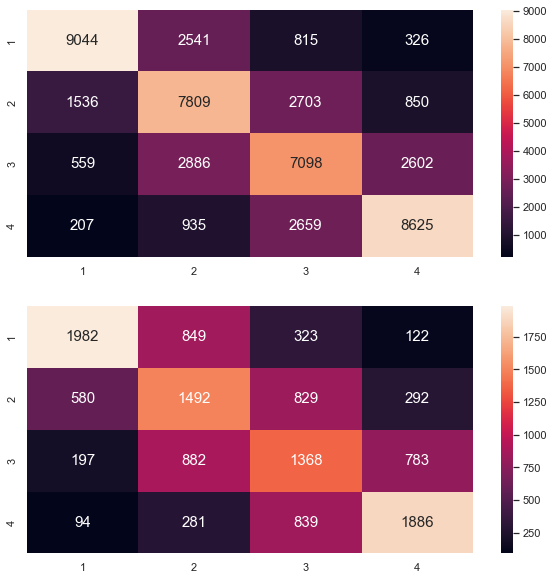

In [85]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))
print('F1 Score for Train Data:', f1_score(y_train, y_train_pred, average='macro'))
print('F1 Score for Test Data:', f1_score(y_test, y_test_pred, average='macro'))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

<b>Insights from Hyperparameters Tuning</b>
<br>As we increase our max depth, our model performance improves. We see that the best performing model has a maximum depth of about 7-13 (f1 > 0.520). As we increase beyond 11, the performance seems to decrease. We will validate this result using cross validation.

<h3>Cross Validation</h3>

We will perform cross validation to ensure that our model is not biased. We will utilise the <b>GridSearchCV</b> technique in sklearn to find the optimum hyperparameters by performing k-fold cross validation. We will choose 4 folds for our cross validation.

<b>Importing the GridSearchCV function from sklearn</b>

In [86]:
from sklearn.model_selection import GridSearchCV

<b>Obtaining optimal hyperparameters through cross validation</b>

In [87]:
hyperparams = {'max_depth': [x for x in range(7,13)]} #we found earlier that the optimal depth is around 7-13
tree = DecisionTreeClassifier()

gridSearch = GridSearchCV(tree, hyperparams, cv=4, scoring='f1_macro')
gridSearch.fit(x_train, y_train.values.ravel())

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [7, 8, 9, 10, 11, 12]},
             scoring='f1_macro')

In [88]:
print('Optimal hyperparameter:', gridSearch.best_params_)
print('F1 score:', gridSearch.best_score_)

Optimal hyperparameter: {'max_depth': 11}
F1 score: 0.5307399470992354


<b>Insights</b>
<br>We see that the optimal depth for a decision tree classifier is 11. Now, let us construct a tree of max depth 11 and gather insights from it.

<h3>Tree of Max Depth 11</h3>

F1 Score for Train Data: 0.5931213758476966
F1 Score for Test Data: 0.5362144529450845


<AxesSubplot:>

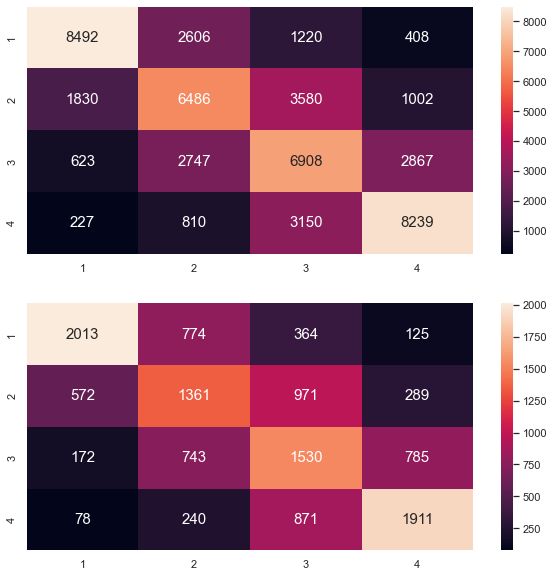

In [94]:
tree = DecisionTreeClassifier(max_depth=11)
tree.fit(x_train, y_train)

y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)


fig, axes = plt.subplots(2, 1, figsize=(10,10))
print('F1 Score for Train Data:', f1_score(y_train, y_train_pred, average='macro'))
print('F1 Score for Test Data:', f1_score(y_test, y_test_pred, average='macro'))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

<b>Plotting of tree</b>

In [95]:
tree_data = export_graphviz(tree, feature_names=x_train.columns, out_file=None, filled=True, rounded=True)
treeviz = pydotplus.graph_from_dot_data(tree_data)
showTree = graphviz.Source(treeviz.to_string())
showTree

<b>Insights from model</b>
<br>We see that the model is able to predict the income classes 1 and 4 well. However, there are higher misclassifications for income class 2.

<b>Features importance from model</b>

From our model, we can find out the importance of each feature in our model.

                                Feature  Importance
9                             Cert_Need    0.000535
5                More than 35hrs weekly    0.000854
6                                  Race    0.001671
17                              HrsWeek    0.002331
7                           Citizenship    0.002347
14                Last Week Working Hrs    0.002882
4                              Gov_Cert    0.005395
10                            WorkClass    0.006846
21  Less than 35hrs for at least 1 week    0.008169
8                     Longest Job Class    0.008226
19                           Occupation    0.010254
1                               Veteran    0.010839
16                                  Sex    0.014053
13            Detailed Household Status    0.019813
11                              Marital    0.022800
20                            Education    0.032670
2                              Pro_Cert    0.039683
15                     Longest Industry    0.047399
3           

<AxesSubplot:xlabel='Importance', ylabel='Feature'>

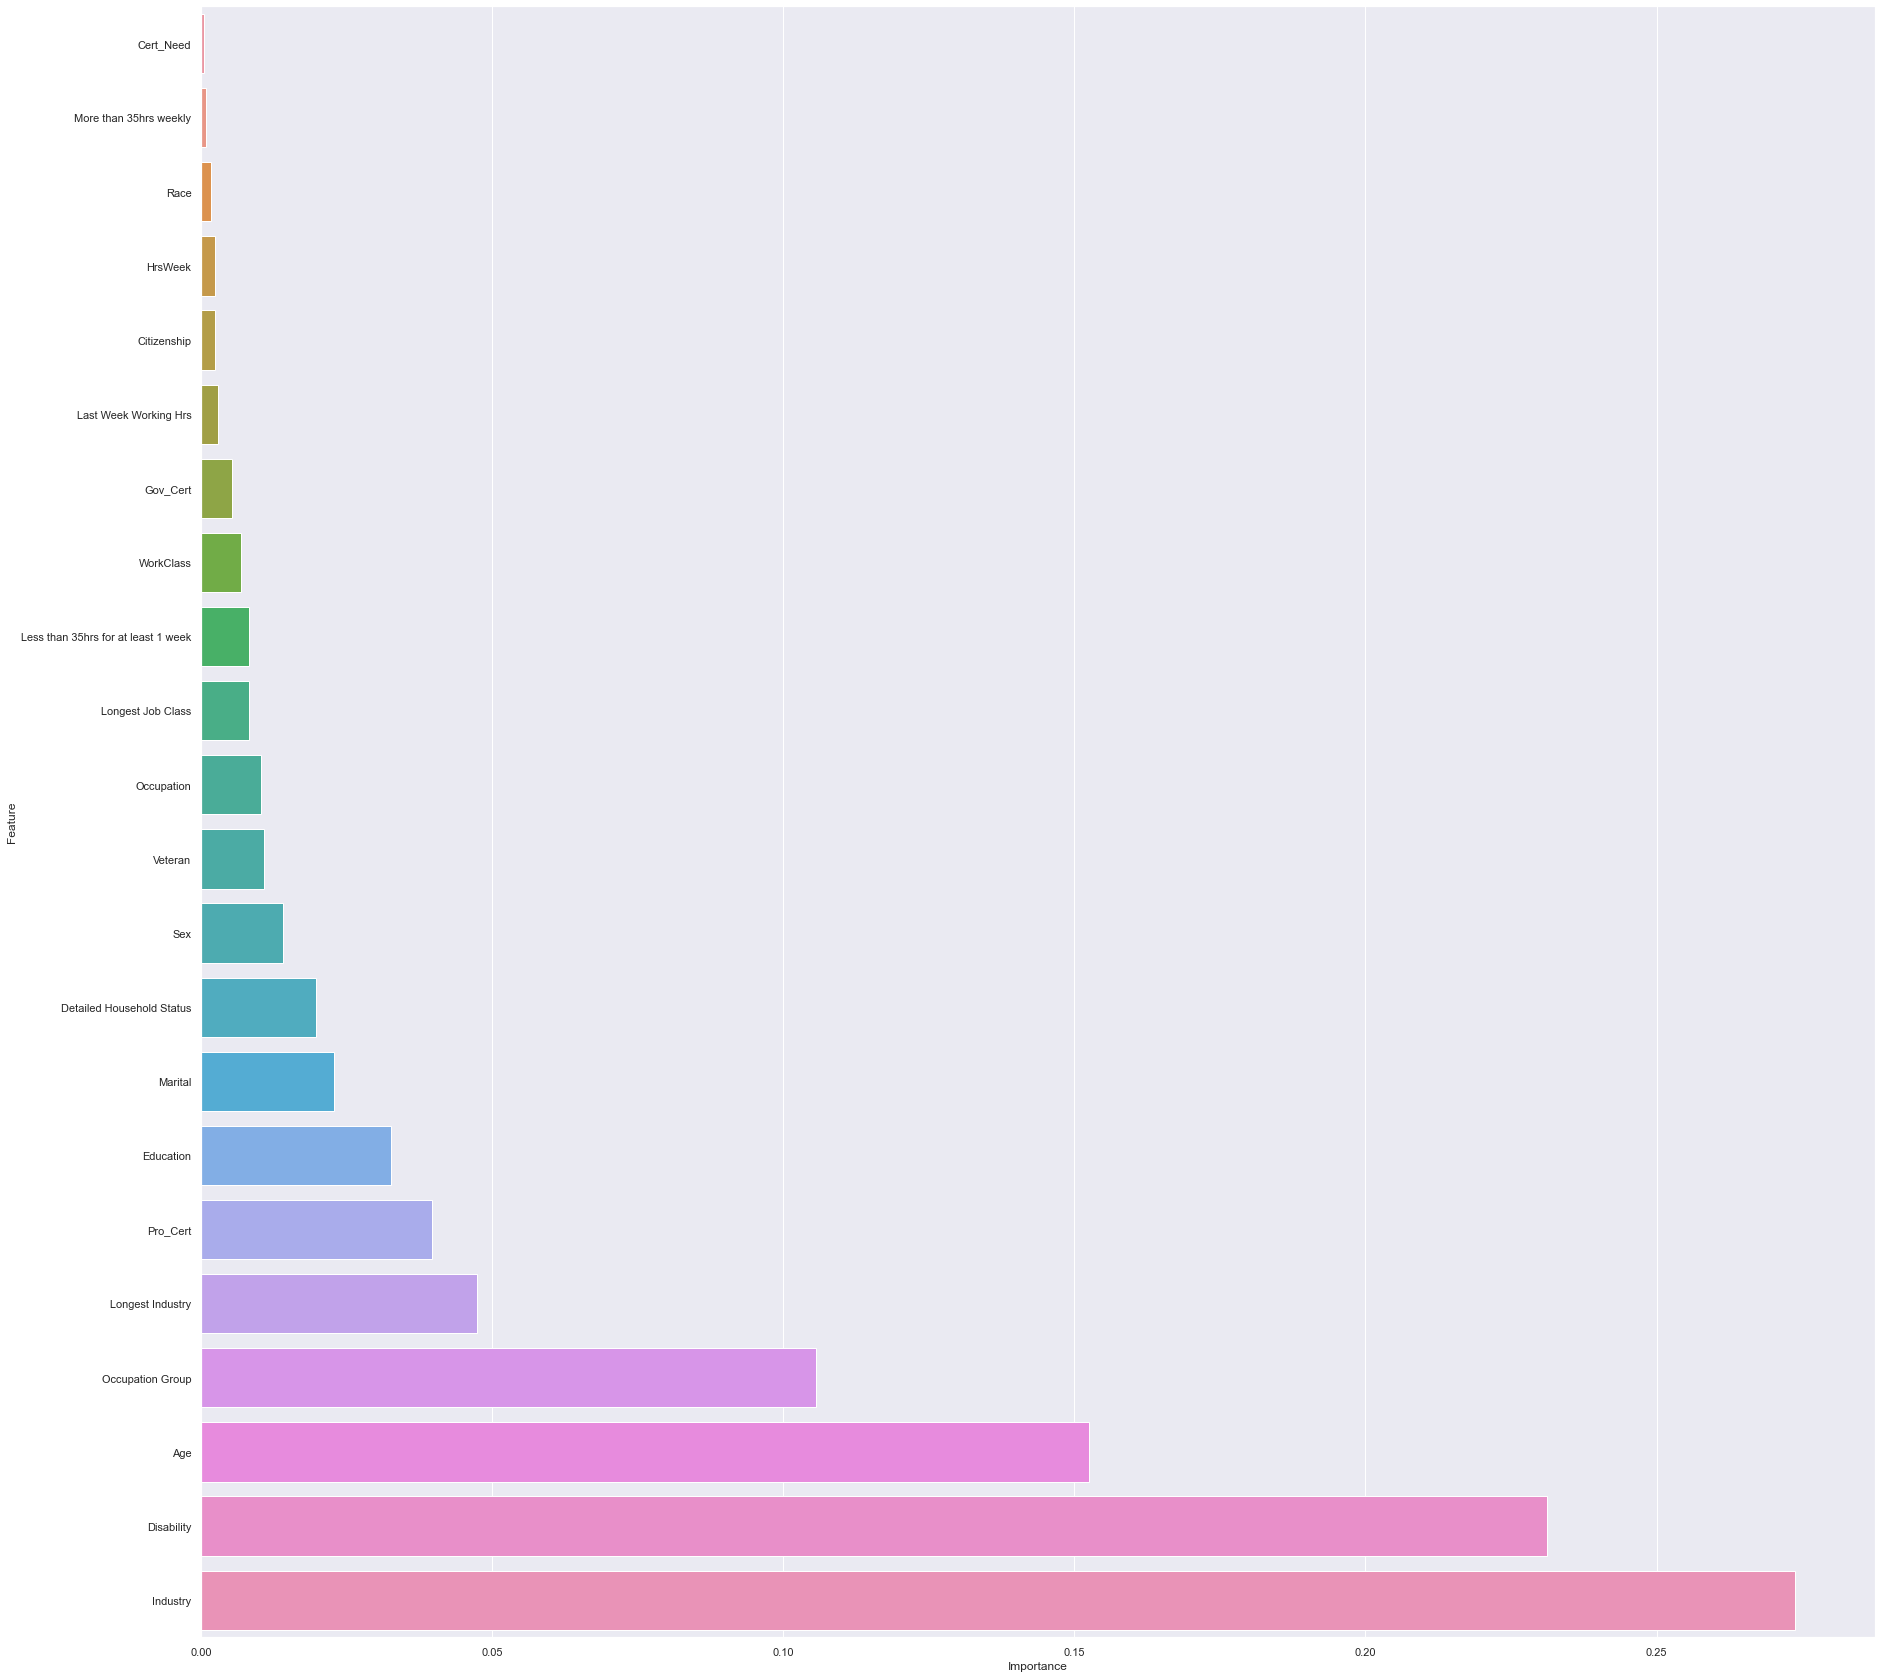

In [91]:
index = list(np.argsort(tree.feature_importances_))
xaxis = []
feature_importance = {}

featureDF = pd.DataFrame(columns=['Feature', 'Importance'])
for i in range(len(index)):
    col = x_train.columns[index[i]]
    importance = tree.feature_importances_.tolist()[i]
    featureDF = featureDF.append({'Feature':col, 'Importance':importance}, ignore_index=True)

featureDF = featureDF.sort_values(by='Importance')
print(featureDF)
fig, axes = plt.subplots(figsize=(30,30))
sb.barplot(y='Feature', x='Importance', data=featureDF, ax=axes)

<b>Training model using Feature Engineered Data</b>

In [98]:
x_trainENGIN = pd.read_csv('Data/x_trainEGIN.csv')
x_testENGIN = pd.read_csv('Data/x_testEGIN.csv')

F1 Score for Train Data: 0.5932016399349102
F1 Score for Test Data: 0.5359371268332438


<AxesSubplot:>

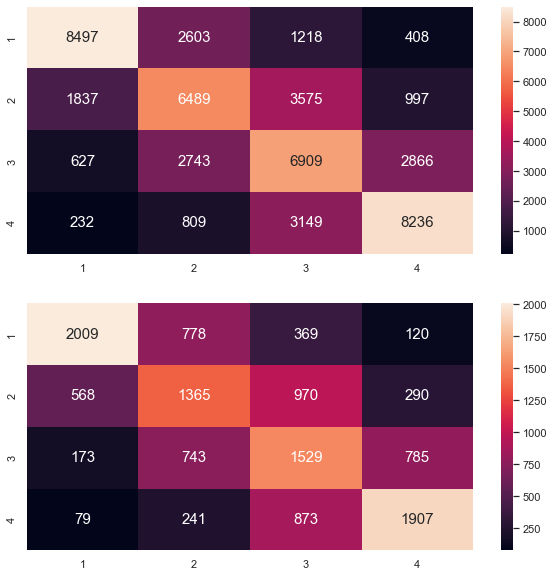

In [100]:
tree = DecisionTreeClassifier(max_depth=11)
tree.fit(x_trainENGIN, y_train)

y_train_pred = tree.predict(x_trainENGIN)
y_test_pred = tree.predict(x_testENGIN)


fig, axes = plt.subplots(2, 1, figsize=(10,10))
print('F1 Score for Train Data:', f1_score(y_train, y_train_pred, average='macro'))
print('F1 Score for Test Data:', f1_score(y_test, y_test_pred, average='macro'))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

We see that using the engineered data, our model performance has decreased slightly.

<b>Insights from this notebook</b>
<br>1. We gather that Industry, Disability, Age and Occupation Group are the top factors considered by our decision tree classifier.
<br>2. By tuning the max depth, we can increase the model's f1 score from about 0.47628 to 0.53621.